In [32]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import squarify
import seaborn as sns

In [2]:
df = pd.read_csv('unemployement-rate-1948-2010.csv')
df.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [3]:
df.rename(columns={'Value':'Unemployment.Rate'}, inplace=True)
df

,Series id,Year,Period,Unemployment.Rate
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5
...,...,...,...,...
741,LNS14000000,2009,M10,10.1
742,LNS14000000,2009,M11,10.0
743,LNS14000000,2009,M12,10.0
744,LNS14000000,2010,M01,9.7


In [4]:
df['Month'] = pd.to_datetime(df['Period'], format='M%m').dt.month_name().str.slice(stop=3)
df

,Series id,Year,Period,Unemployment.Rate,Month
0,LNS14000000,1948,M01,3.4,Jan
1,LNS14000000,1948,M02,3.8,Feb
2,LNS14000000,1948,M03,4.0,Mar
3,LNS14000000,1948,M04,3.9,Apr
4,LNS14000000,1948,M05,3.5,May
...,...,...,...,...,...
741,LNS14000000,2009,M10,10.1,Oct
742,LNS14000000,2009,M11,10.0,Nov
743,LNS14000000,2009,M12,10.0,Dec
744,LNS14000000,2010,M01,9.7,Jan


In [5]:
df = df.drop(['Series id', 'Period'], axis=1)
index_df = df.set_index('Year')


In [6]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)
df

,Year,Unemployment.Rate,Month
0,1948,3.4,Jan
1,1948,3.8,Feb
2,1948,4.0,Mar
3,1948,3.9,Apr
4,1948,3.5,May
...,...,...,...
741,2009,10.1,Oct
742,2009,10.0,Nov
743,2009,10.0,Dec
744,2010,9.7,Jan


Text(3.674999999999997, 0.5, 'Count')

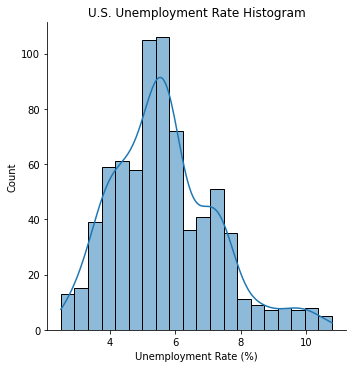

In [41]:
sns.displot( df['Unemployment.Rate'], bins=20, kde=True)
plt.title('U.S. Unemployment Rate Histogram')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Count')

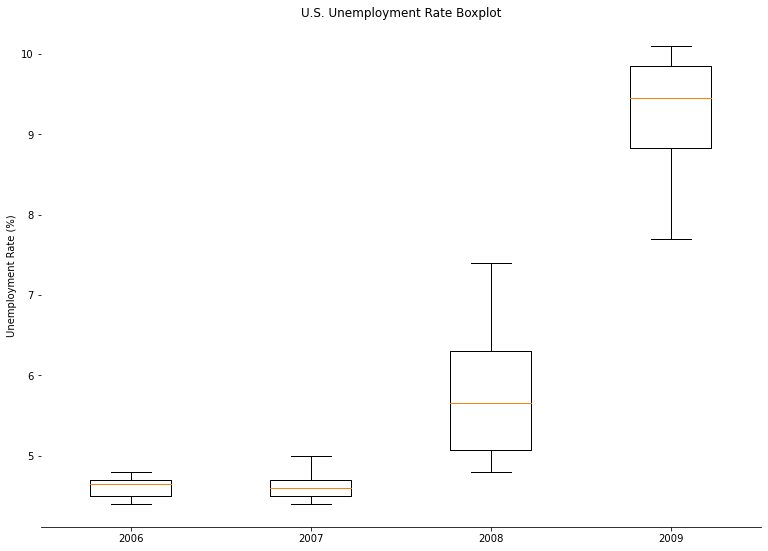

In [31]:
data_1 = df.loc[df['Year'] == 2006]
data_2 = df.loc[df['Year'] == 2007]
data_3 = df.loc[df['Year'] == 2008]
data_4 = df.loc[df['Year'] == 2009]

data = [data_1['Unemployment.Rate'], data_2['Unemployment.Rate'], data_3['Unemployment.Rate'],
        data_4['Unemployment.Rate']] 
  
fig = plt.figure(figsize =(10, 7)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel('Unemployment Rate (%)')
labels = ['2006', '2007', '2008', '2009']
ax.boxplot(data, labels=labels)    
ax.set_title('U.S. Unemployment Rate Boxplot')    
# show plot 
plt.show() 

In [42]:
from matplotlib.ticker import FuncFormatter

In [124]:
palette = sns.color_palette("Reds", 5)

In [147]:
df_2008 = df.loc[df['Year'] == 2008]

In [148]:
df_2008 = df_2008.drop(['Year'], axis=1)
df_2008

,Unemployment.Rate,Month
720,5.0,Jan
721,4.8,Feb
722,5.1,Mar
723,5.0,Apr
724,5.4,May
725,5.5,Jun
726,5.8,Jul
727,6.1,Aug
728,6.2,Sep
729,6.6,Oct


In [149]:
df_2008 = df_2008[['Month', 'Unemployment.Rate']]

In [150]:
df_2008

,Month,Unemployment.Rate
720,Jan,5.0
721,Feb,4.8
722,Mar,5.1
723,Apr,5.0
724,May,5.4
725,Jun,5.5
726,Jul,5.8
727,Aug,6.1
728,Sep,6.2
729,Oct,6.6


In [151]:
jan = df_2008.iloc[0].to_numpy()
apr = df_2008.iloc[3].to_numpy()
jul = df_2008.iloc[6].to_numpy()
oct = df_2008.iloc[9].to_numpy()

In [159]:
def bulletgraph(data=None, limits=None, labels=None, axis_label=None, title=None,
                size=(5, 3), palette=None, formatter=None, target_color="gray",
                bar_color="black", label_color="gray"):
    """ Build out a bullet graph image
        Args:
            data = List of labels, measures and targets
            limits = list of range valules
            labels = list of descriptions of the limit ranges
            axis_label = string describing x axis
            title = string title of plot
            size = tuple for plot size
            palette = a seaborn palette
            formatter = matplotlib formatter object for x axis
            target_color = color string for the target line
            bar_color = color string for the small bar
            label_color = color string for the limit label text
        Returns:
            a matplotlib figure
    """
    # Determine the max value for adjusting the bar height
    # Dividing by 10 seems to work pretty well
    h = limits[-1] / 10

    # Use the green palette as a sensible default
    if palette is None:
        palette = sns.light_palette("red", len(limits), reverse=False)

    # Must be able to handle one or many data sets via multiple subplots
    if len(data) == 1:
        fig, ax = plt.subplots(figsize=size, sharex=True)
    else:
        fig, axarr = plt.subplots(len(data), figsize=size, sharex=True)

    # Add each bullet graph bar to a subplot
    for idx, item in enumerate(data):

        # Get the axis from the array of axes returned when the plot is created
        if len(data) > 1:
            ax = axarr[idx]

        # Formatting to get rid of extra marking clutter
        ax.set_aspect('equal')
        ax.set_yticklabels([item[0]])
        ax.set_yticks([1])
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)

        prev_limit = 0
        for idx2, lim in enumerate(limits):
            # Draw the bar
            ax.barh([1], lim - prev_limit, left=prev_limit, height=h,
                    color=palette[idx2])
            prev_limit = lim
        rects = ax.patches
        # The last item in the list is the value we're measuring
        # Draw the value we're measuring
        ax.barh([1], item[1], height=(h / 3), color=bar_color)

        # Need the ymin and max in order to make sure the target marker
        # fits
        ymin, ymax = ax.get_ylim()
        ax.vlines(
            item[2], ymin * .9, ymax * .9, linewidth=1.5, color=target_color)

    # Now make some labels
    if labels is not None:
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(
                rect.get_x() + rect.get_width() / 2,
                -height * .4,
                label,
                ha='center',
                va='bottom',
                color=label_color)
    if formatter:
        ax.xaxis.set_major_formatter(formatter)
    if axis_label:
        ax.set_xlabel(axis_label)
    if title:
        fig.suptitle(title, fontsize=14)
    fig.subplots_adjust(hspace=0)

In [162]:
data = [(jan[0], jan[1], 5), (apr[0], apr[1], 5.1), (jul[0], jul[1], 5.5), (oct[0], oct[1], 6.2)]

<ipython-input-159-3c1633dadde6>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0]])


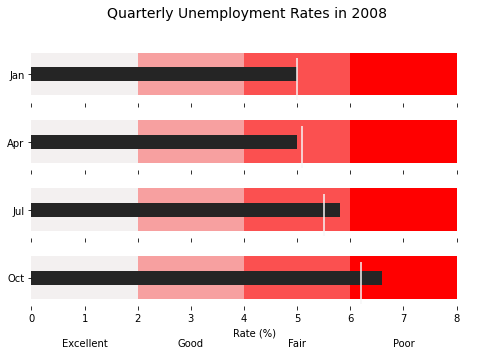

In [166]:
bulletgraph(data, limits=[2, 4, 6, 8],
            labels=['Excellent', 'Good', 'Fair', 'Poor'], size=(8,5),
            axis_label= 'Rate (%)', label_color="black",
            bar_color="#252525", target_color='#f7f7f7',
            title='Quarterly Unemployment Rates in 2008')
